<a href="https://colab.research.google.com/github/Neoneto/Coding_Dojo_Week7/blob/main/KNN_Challenge_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Challenge (Practice)
Submitted by Kenneth Alaba

## Data Pre-Processing

In [56]:
import pandas as pd
import numpy as np
#import seaborn to make a nice heatmap for our confusion matrix
import seaborn as sns

#import some necessary tools
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

#Importing the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier


In [57]:
# Load the data

## Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

## Opening the file
filename = '/content/drive/My Drive/Coding Dojo/05 Week 5: Intro to Machine Learning/abalone.data'

## Storing the data in df
df = pd.read_csv(filename, header = None)

# Set column names

df.rename(columns = {0: 'sex',
                     1: 'length',
                     2: 'diameter',
                     3: 'height',
                     4: 'whole_weight',
                     5: 'shucked_weight',
                     6: 'viscera_weight',
                     7: 'shell_weight',
                     8: 'rings'}, inplace = True)

df.head()

# display first few rows
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [58]:
df.sex.value_counts(normalize = True)

M    0.365813
I    0.321283
F    0.312904
Name: sex, dtype: float64

Because the value counts of the sex column is almost equally divided, we can say that the data set is balanced.

## Pipeline

In [59]:
# Define the targets and features
X = df.drop(columns = ['sex'])
y = df['sex']

In [60]:
#Train-test split.  Set the random state to 42
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42, stratify = y )

In [61]:
#Create a pipeline with a StandardScaler and a KNeighborsClassifier

### Standard scaler
scaler = StandardScaler()

### Instantiate the knn model
knn = KNeighborsClassifier()

### create the pipeline
knn_pipe = make_pipeline(scaler, knn)


In [62]:
### Fit the model
knn_pipe.fit(X_train, y_train )

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [63]:
### Make predictions and store their test predictions
knn_pred = knn_pipe.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


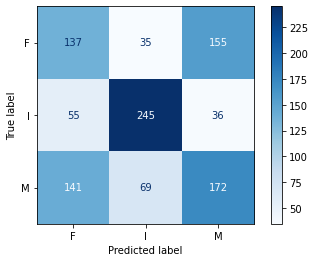

In [64]:
# Import libraries
from sklearn.metrics import plot_confusion_matrix

### Display the confusion matrix for referencing
plot_confusion_matrix(knn_pipe, X_test, y_test, cmap = 'Blues');

In [65]:
### Calculate the accuracy of the default model
knn_accuracy = accuracy_score(y_test, knn_pred)

### Print the result
print(f'The default model with n-neighbors = 5 has an accuracy score of {knn_accuracy:.3f}')

The default model with n-neighbors = 5 has an accuracy score of 0.530


## Optimal KNN Model

In [66]:
# Create a list of desired K values
Ks = np.arange(1,30)

# Initialise a list to store the accuracy scores
scores = list([])

# Iterate over all K values
# Creating a KNN model and calculating then storing the accuracy score
for K in Ks:
  knn_pipe = make_pipeline(scaler, KNeighborsClassifier(n_neighbors = K) )
  knn_pipe.fit(X_train, y_train )
  accuracy = accuracy_score(y_test, knn_pipe.predict(X_test) )
  scores.append(accuracy)



In [67]:
len(y_train)

3132

Text(0.5, 0, 'K n-neighbors')

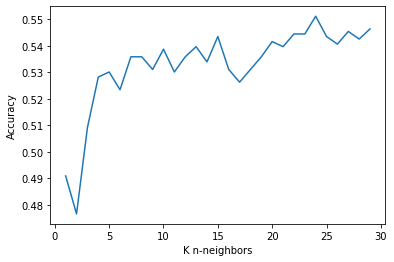

In [68]:
# import library
import matplotlib.pyplot as plt

# Plot the accuracy scores as a function of n-neighbors
plt.plot(Ks, scores)
plt.ylabel('Accuracy')
plt.xlabel('K n-neighbors')

From the plot, we can see that the accuracy score generally increases as we increase the value of K. However, after some value, around 5, the increase in accuracy is not that significant.

In [69]:
# Get the max accuracy score and the k-value that produced this score
max_acc = max(scores)
K_opt = Ks[np.where(scores == max_acc)]
K_opt = K_opt[0]

print(f'Optimal accuracy is {max_acc:.3f} from K = {K_opt}')

Optimal accuracy is 0.551 from K = 24


In [72]:
#Create a new pipeline with optimal KNeighborsClassifier

### Instantiate the knn model
opt_knn = KNeighborsClassifier(n_neighbors = K_opt)

### create the pipeline
opt_knn_pipe = make_pipeline(scaler, opt_knn)

### Fit the model
opt_knn_pipe.fit(X_train, y_train )

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=24))])

## Evaluate the Optimal KNN Model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


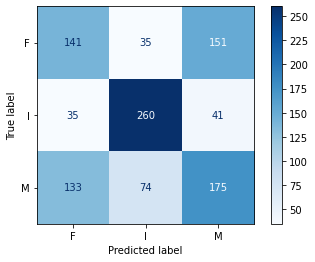

In [73]:
### Display the confusion matrix of the optimal knn model
plot_confusion_matrix(opt_knn_pipe, X_test, y_test, cmap = 'Blues');